# Problem Description

Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers `(asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [34]:
Bank_Loan_df=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
Bank_Loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [35]:
Bank_Loan_df.isnull().sum().sum()

0

In [36]:
Bank_Loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Observation of the statistics on the Bank_Loan dataframe
We could see that there is a negative value in the Experience Column of the Bank_Loan dataframe which is not possible. So assuming all the negative values could be by mistake we could change -3 to 3 years of experience and do the same for all the negative values. The negative values in the dataframe are -3,-2,-1 for the experience column.

In [37]:
Bank_Loan_df["Experience"]=np.where(Bank_Loan_df["Experience"] < -2 ,3, Bank_Loan_df["Experience"])

In [38]:
Bank_Loan_df["Experience"]=np.where(Bank_Loan_df["Experience"] < -1 ,2, Bank_Loan_df["Experience"])

In [39]:
Bank_Loan_df["Experience"]=np.where(Bank_Loan_df["Experience"] < 0 ,1, Bank_Loan_df["Experience"])

In [40]:
Bank_Loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Deleting the ID column as it will not affect the target column

In [41]:
Bank_Loan_df = Bank_Loan_df.drop("ID", axis=1)

In [42]:
Bank_Loan_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Distribution of the columns

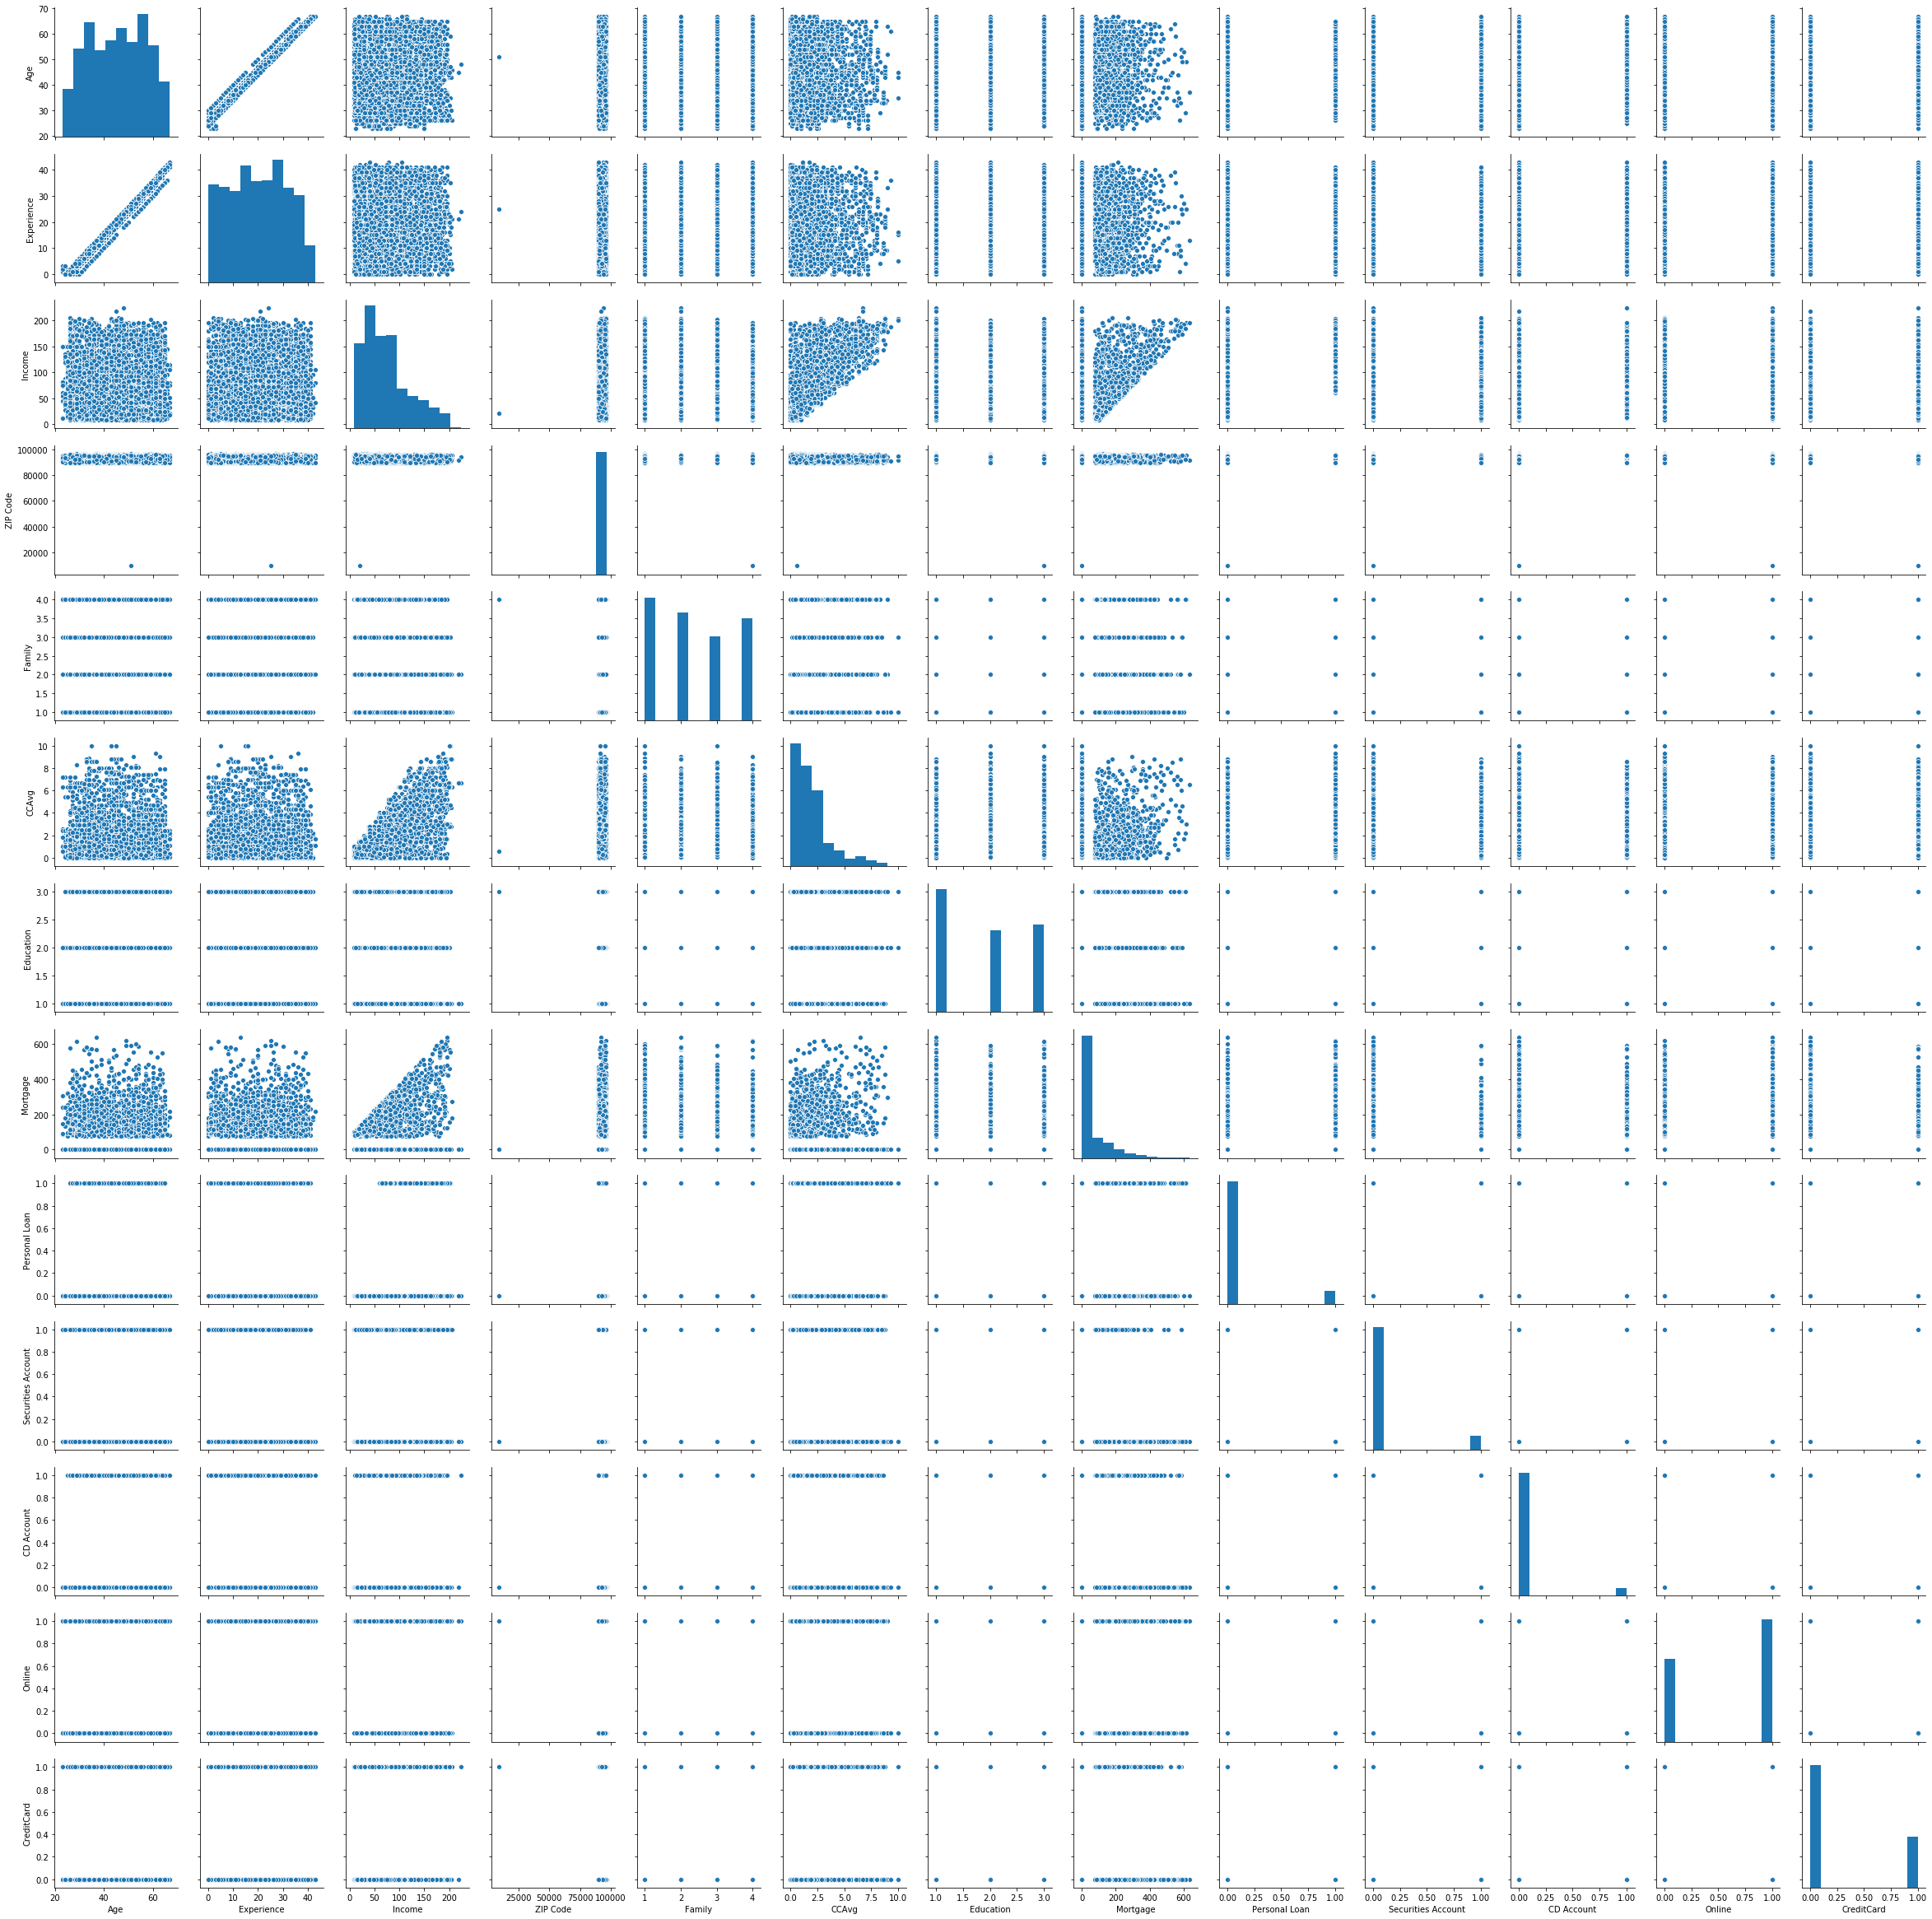

In [43]:
sns.pairplot(Bank_Loan_df)

# Conclusion

Above is the distribution of all the different features.

2 features Age and Experience seems to be normally distributed.

# Distribution with respect to the target class Personal Loan

C:\Users\Asmin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Asmin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


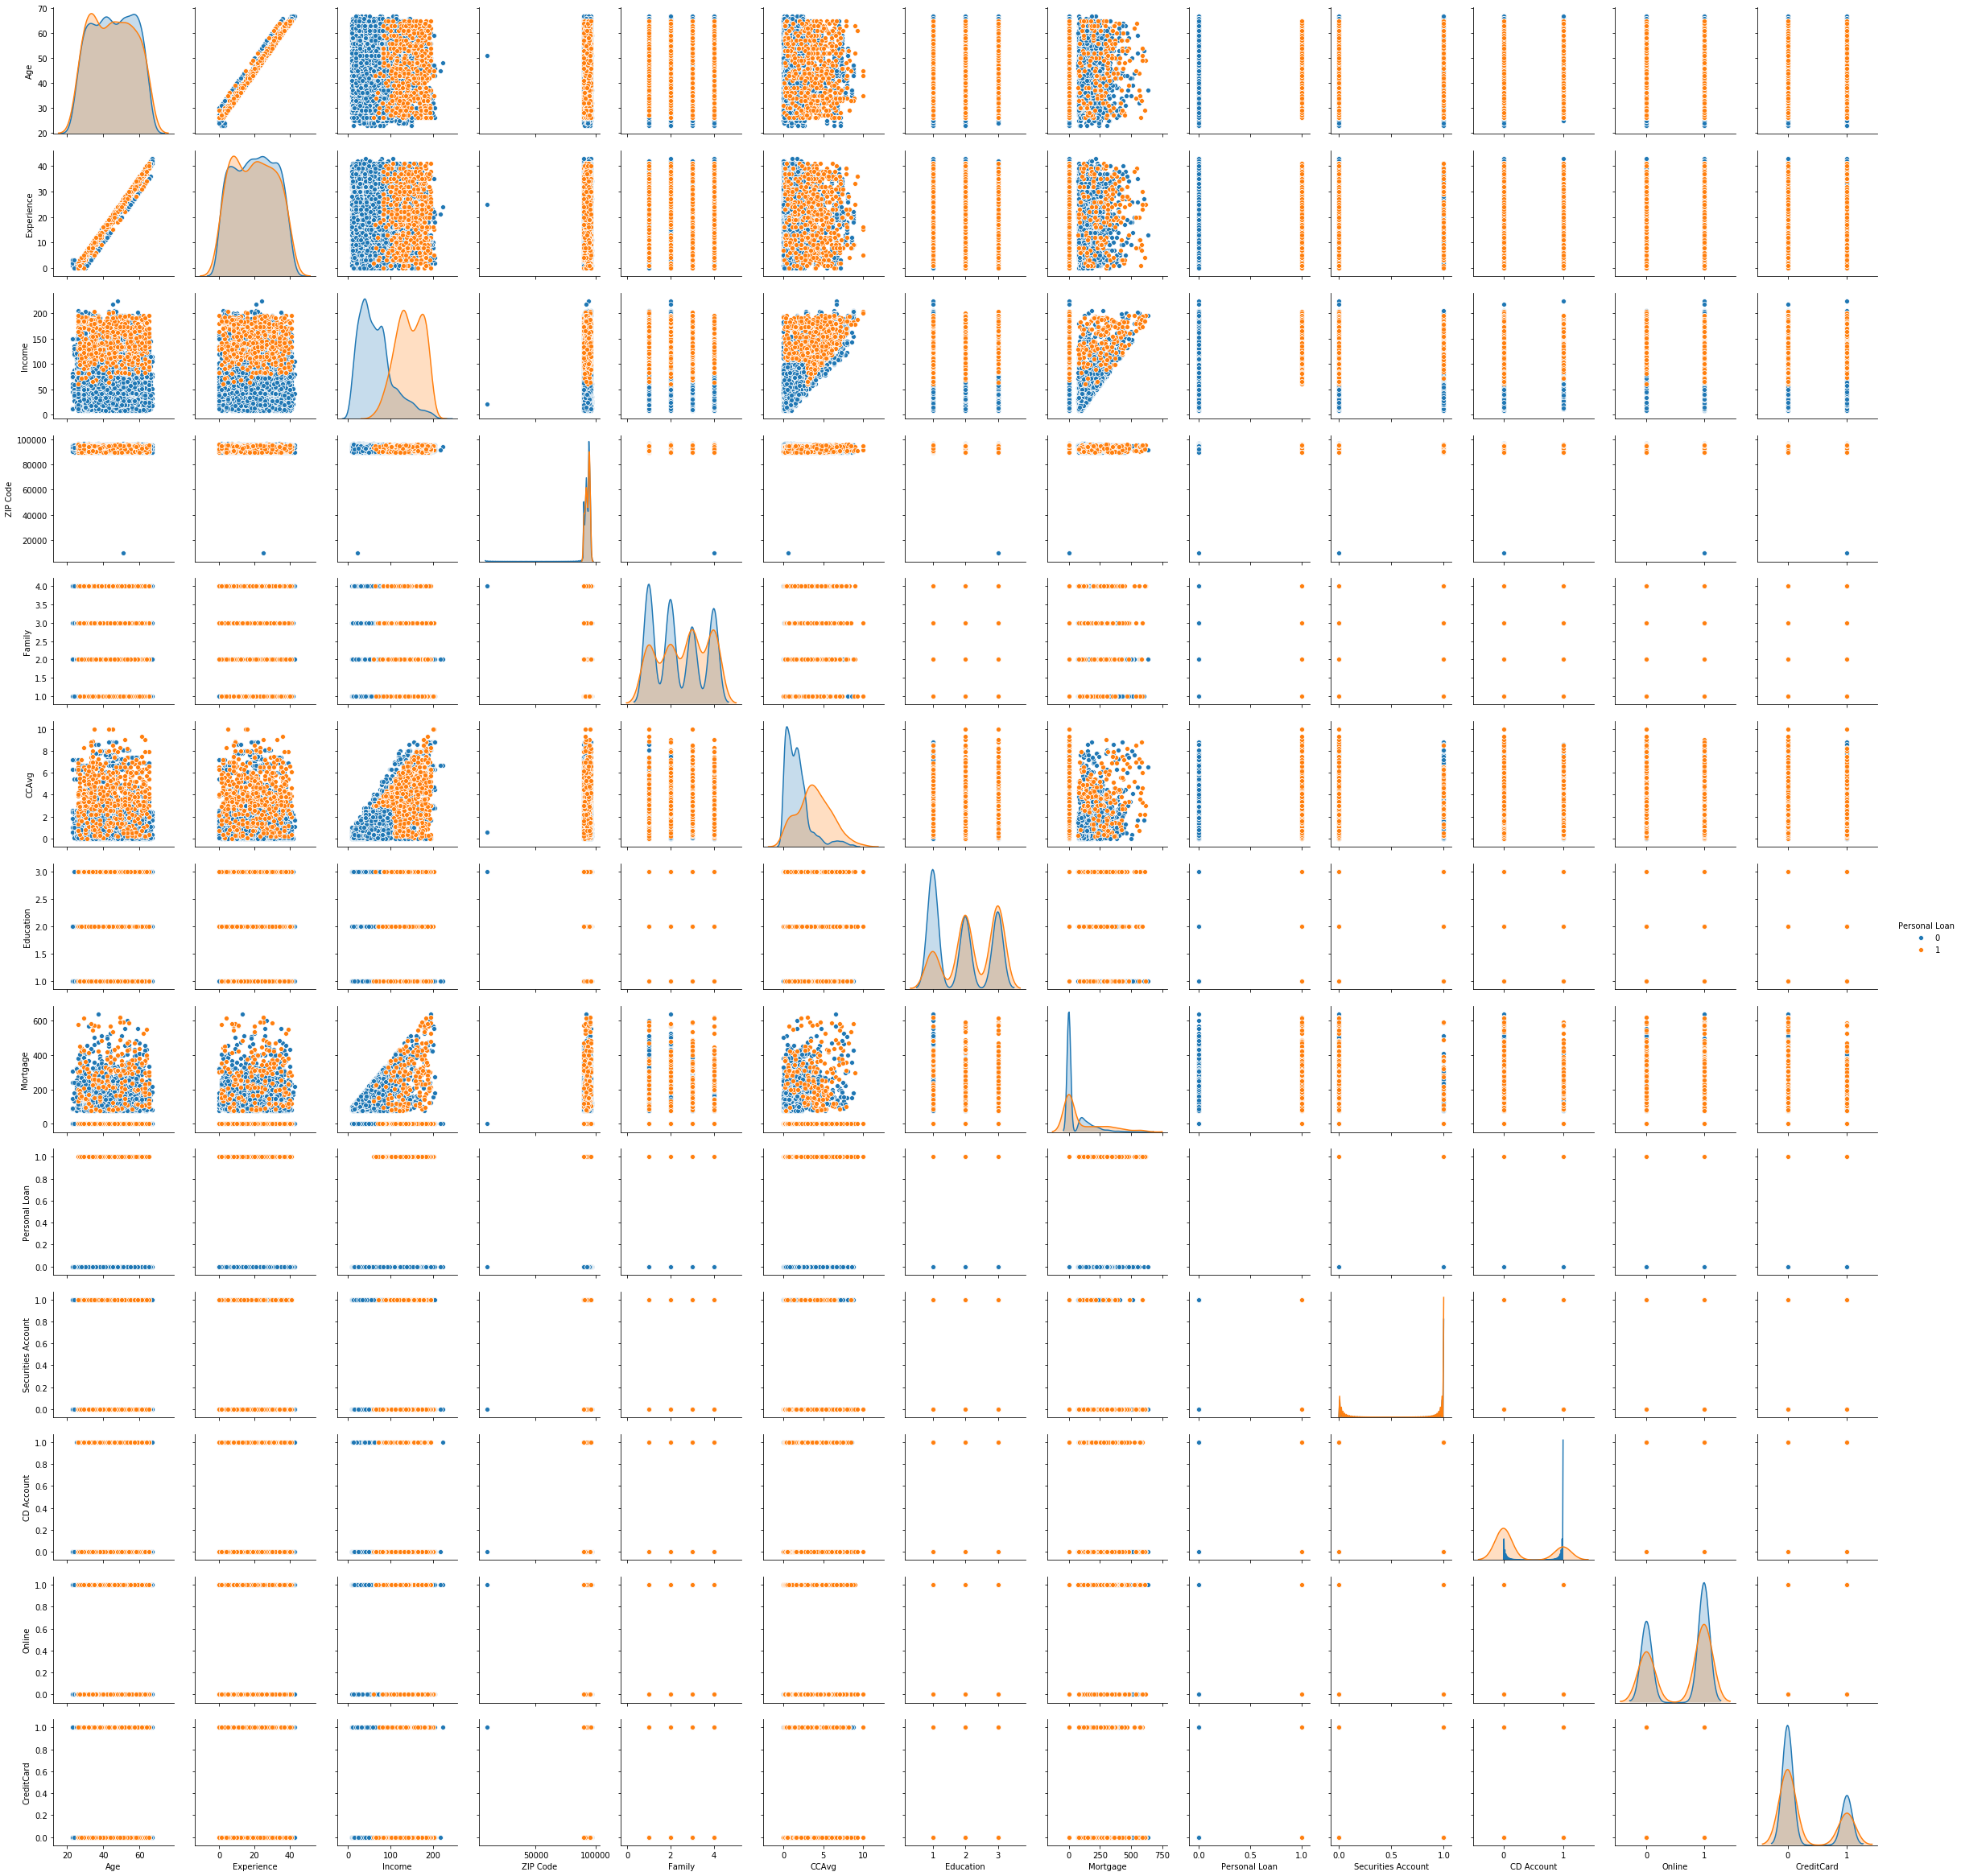

In [44]:
sns.pairplot(Bank_Loan_df, hue='Personal Loan')

# Conclusion

From the above picture we could see that income is a very good feature to predict the target variable Personal Loan

# Dividing the Dataframe into dependent and target columns i.e X and Y

In [45]:
X=Bank_Loan_df.drop("Personal Loan", axis=1)
Y=Bank_Loan_df["Personal Loan"]

# NAIVE BAYES

In [46]:
train_set_NB, test_set_NB, train_labels_NB, test_labels_NB = train_test_split(X, Y, test_size=0.30, random_state=1)

In [47]:
print (train_set_NB.shape) 
print (test_set_NB.shape)

(3500, 12)
(1500, 12)


In [48]:
print (train_labels_NB.shape) 
print (test_labels_NB.shape)

(3500,)
(1500,)


In [49]:
from sklearn.naive_bayes import GaussianNB

Ploan_df_GNB = GaussianNB()
Ploan_df_GNB = Ploan_df_GNB.fit(train_set_NB, train_labels_NB)

In [50]:
y_pred_GNB=Ploan_df_GNB.predict(test_set_NB)

In [51]:
y_pred_GNB

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels_NB, y_pred_GNB)

0.884

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_labels_NB, y_pred_GNB)
print(confusion_matrix)

[[1241  110]
 [  64   85]]


# From the above Confusion metrics below are my findings:
False Positive is the metric we should consider for this classification problem, as the incorrect prediction of customers who will take loan but we actually predict them as they will not take loan. We need to reduce the type I error.

False Positives (FP): we incorrectly predicted that they will not take the loan (a "Type I error") 12
Falsely predict positive Type I error

# LOGISTIC REGRESSION

In [54]:
train_set_LR, test_set_LR, train_labels_LR, test_labels_LR = train_test_split(X, Y, test_size=0.30, random_state=1)

In [55]:
print (train_set_LR.shape) 
print (test_set_LR.shape)
print (train_labels_LR.shape)
print (test_labels_LR.shape)

(3500, 12)
(1500, 12)
(3500,)
(1500,)


In [60]:
from sklearn.linear_model import LogisticRegression
PersonalLoan_LR= LogisticRegression()
PersonalLoan_LR.fit(train_set_LR,train_labels_LR)

C:\Users\Asmin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
PersonalLoan_predict_LR=PersonalLoan_LR.predict(test_set_LR)
print(PersonalLoan_predict_LR)

[0 0 0 ... 0 0 0]


In [65]:
PersonalLoan_score_LR=PersonalLoan_LR.score(test_set_LR,test_labels_LR)
print(PersonalLoan_score_LR)

0.9073333333333333


In [66]:
from sklearn import metrics
print(metrics.confusion_matrix(test_labels_LR,PersonalLoan_predict_LR))

[[1318   33]
 [ 106   43]]


# From the above Confusion metrics below are my findings:
False Positive is the metric we should consider for this classification problem, as the incorrect prediction of customers who will take loan but we actually predict them as they will not take loan. We need to reduce the type I error.

False Positives (FP): we incorrectly predicted that they will not take the loan (a "Type I error") 12
Falsely predict positive Type I error

# KNN

In [67]:
train_set_KNN, test_set_KNN, train_labels_KNN, test_labels_KNN = train_test_split(X, Y, test_size=0.30, random_state=1)

In [68]:
print (train_set_KNN.shape) 
print (test_set_KNN.shape)
print (train_labels_KNN.shape)
print (test_labels_KNN.shape)

(3500, 12)
(1500, 12)
(3500,)
(1500,)


In [69]:
from sklearn.neighbors import KNeighborsClassifier
PersonalLoan_KNN=KNeighborsClassifier(n_neighbors=8)

In [71]:
PersonalLoan_KNN.fit(train_set_KNN,train_labels_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [72]:
PersonalLoan_predict_KNN=PersonalLoan_KNN.predict(test_set_KNN)
print(PersonalLoan_predict_KNN)

[0 0 0 ... 0 0 0]


In [73]:
PersonalLoan_score_KNN=PersonalLoan_KNN.score(test_set_KNN, test_labels_KNN)
print(PersonalLoan_score_KNN)

0.9013333333333333


In [74]:
print(metrics.confusion_matrix(test_labels_KNN,PersonalLoan_predict_KNN))

[[1339   12]
 [ 136   13]]


# From the above Confusion metrics below are my findings:
False Positive is the metric we should consider for this classification problem, as the incorrect prediction of customers who will take loan but we actually predict them as they will not take loan. We need to reduce the type I error.

False Positives (FP): we incorrectly predicted that they will not take the loan (a "Type I error") 12
Falsely predict positive Type I error

 # Result

From this classification problem I conclude that more than improving the accuracy of the three different models used we need to reduce the number of False Positives which is the number of customers which were potemtial customers to take loan but our model predicted to be as the customers who will not take loan.
So from the above models we could conclude that KNN classification gives the accuracy almost equal to that of Logistic Regression but the Type I Error has reduced quite a lot. So I feel KNN is the model we should use for this classification problem with number of neighbours as 8.